In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

/home/ggk/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ggk/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ggk/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ggk/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ggk/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ggk/anaconda3/lib/python3.6/importlib/_bootstrap.py:21

In [2]:
patient_data = pd.read_csv('Patientdata.csv')
hospital_data = pd.read_csv('Hospitaldata.csv')
diagnosis_data = pd.read_csv('Diagnosisdata.csv')

In [3]:
patient_data.shape

(31513, 7)

In [4]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31513 entries, 0 to 31512
Data columns (total 7 columns):
patientID    31513 non-null object
race         31513 non-null object
gender       31513 non-null object
age          31513 non-null object
weight       944 non-null object
Target       24256 non-null object
istrain      31513 non-null int64
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [5]:
patient_data.describe(include = 'all')

,patientID,race,gender,age,weight,Target,istrain
count,31513,31513,31513,31513,944,24256,31513.000000
unique,24256,5,2,10,8,2,NaN
top,PT745013,type3,Female,[70-80),[75-100),No,NaN
freq,2,23337,16485,7846,382,17786,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.769714
std,NaN,NaN,NaN,NaN,NaN,NaN,0.421022
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [6]:
diagnosis_data.describe(include = 'all')

,patientID,num_procedures,num_medications,num_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,...,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,istrain
count,31513,31513.000000,31513.000000,31513.000000,31513,31513,31513,31513,31513,31513,...,31513,31513,31513,31513,31513,31513,31513,31513,31513,31513.000000
unique,24256,NaN,NaN,NaN,4,4,4,4,4,4,...,2,2,4,3,2,1,2,2,2,NaN
top,PT745013,NaN,NaN,NaN,None,None,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,2,NaN,NaN,NaN,30076,25699,24818,31135,31312,31483,...,31512,31500,15572,31320,31512,31513,31511,17842,23530,NaN
mean,NaN,1.454257,15.533716,7.125535,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.769714
std,NaN,1.766432,8.472741,2.042480,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421022
min,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,0.000000,10.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,1.000000,14.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,2.000000,20.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [7]:
diagnosis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31513 entries, 0 to 31512
Data columns (total 29 columns):
patientID                  31513 non-null object
num_procedures             31513 non-null int64
num_medications            31513 non-null int64
num_diagnoses              31513 non-null int64
max_glu_serum              31513 non-null object
A1Cresult                  31513 non-null object
metformin                  31513 non-null object
repaglinide                31513 non-null object
nateglinide                31513 non-null object
chlorpropamide             31513 non-null object
glimepiride                31513 non-null object
acetohexamide              31513 non-null object
glipizide                  31513 non-null object
glyburide                  31513 non-null object
tolbutamide                31513 non-null object
pioglitazone               31513 non-null object
rosiglitazone              31513 non-null object
acarbose                   31513 non-null object
miglitol    

In [8]:
diagnosis_data.corr()

,num_procedures,num_medications,num_diagnoses,istrain
num_procedures,1.000000,0.416328,0.081157,-0.004841
num_medications,0.416328,1.000000,0.257756,0.003373
num_diagnoses,0.081157,0.257756,1.000000,0.000554
istrain,-0.004841,0.003373,0.000554,1.000000


In [9]:
merge_one = pd.merge(patient_data,hospital_data,how='inner',left_on=['patientID','istrain'],right_on=['patientID','istrain'])

In [10]:
merge_two = pd.merge(merge_one,diagnosis_data,how='inner',left_on=['patientID','istrain'],right_on=['patientID','istrain'])

In [11]:
merge_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31513 entries, 0 to 31512
Data columns (total 41 columns):
patientID                  31513 non-null object
race                       31513 non-null object
gender                     31513 non-null object
age                        31513 non-null object
weight                     944 non-null object
Target                     24256 non-null object
istrain                    31513 non-null int64
AdmissionID                31513 non-null object
Admission_date             31513 non-null object
Discharge_date             31513 non-null object
admission_type_id          31513 non-null int64
admission_source_id        31513 non-null int64
payer_code                 18303 non-null object
medical_specialty          16575 non-null object
num_procedures             31513 non-null int64
num_medications            31513 non-null int64
num_diagnoses              31513 non-null int64
max_glu_serum              31513 non-null object
A1Cresult        

In [12]:
for col in diagnosis_data.columns:
    print(diagnosis_data[col].value_counts())
    print()

PT745013    2
PT7905      2
PT413520    2
PT991669    2
PT641734    2
PT548938    2
PT71272     2
PT954039    2
PT561050    2
PT378964    2
PT478679    2
PT740433    2
PT611987    2
PT510061    2
PT161412    2
PT408405    2
PT807317    2
PT913707    2
PT185225    2
PT673571    2
PT206555    2
PT870560    2
PT396377    2
PT439764    2
PT664191    2
PT945053    2
PT203181    2
PT740938    2
PT993359    2
PT773937    2
           ..
PT794220    1
PT626987    1
PT994894    1
PT276969    1
PT690404    1
PT752815    1
PT624176    1
PT360600    1
PT698169    1
PT166038    1
PT629252    1
PT206733    1
PT212492    1
PT372924    1
PT951578    1
PT867640    1
PT75506     1
PT570126    1
PT882861    1
PT798774    1
PT481942    1
PT372597    1
PT405215    1
PT718370    1
PT979811    1
PT243728    1
PT248892    1
PT388416    1
PT894356    1
PT455367    1
Name: patientID, Length: 24256, dtype: int64

0    13558
1     6451
2     4039
3     3206
6     1781
4     1395
5     1083
Name: num_procedures, d

In [13]:
merge_two.corr()

,istrain,admission_type_id,admission_source_id,num_procedures,num_medications,num_diagnoses
istrain,1.000000,-0.000215,-0.000325,-0.004841,0.003373,0.000554
admission_type_id,-0.000215,1.000000,0.088920,0.136476,0.107792,-0.095686
admission_source_id,-0.000325,0.088920,1.000000,-0.150197,-0.090490,0.074100
num_procedures,-0.004841,0.136476,-0.150197,1.000000,0.416328,0.081157
num_medications,0.003373,0.107792,-0.090490,0.416328,1.000000,0.257756
num_diagnoses,0.000554,-0.095686,0.074100,0.081157,0.257756,1.000000


In [14]:
merge_two.describe(include = 'all')

,patientID,race,gender,age,weight,Target,istrain,AdmissionID,Admission_date,Discharge_date,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
count,31513,31513,31513,31513,944,24256,31513.000000,31513,31513,31513,...,31513,31513,31513,31513,31513,31513,31513,31513,31513,31513
unique,24256,5,2,10,8,2,NaN,24256,912,923,...,2,2,2,4,3,2,1,2,2,2
top,PT745013,type3,Female,[70-80),[75-100),No,NaN,AD34835,2014-11-22,2015-02-13,...,No,No,No,No,No,No,No,No,No,Yes
freq,2,23337,16485,7846,382,17786,NaN,2,56,57,...,31510,31512,31500,15572,31320,31512,31513,31511,17842,23530
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.769714,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.421022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
train = merge_two[merge_two.istrain==1]
test = merge_two[merge_two.istrain==0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68985e1828>,
      dtype=object)

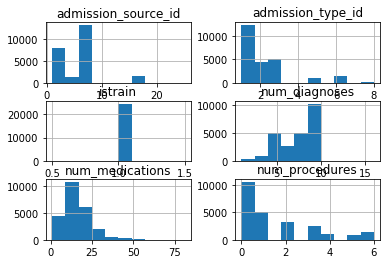

In [16]:
train.hist()

Text(0,0.5,'Count')

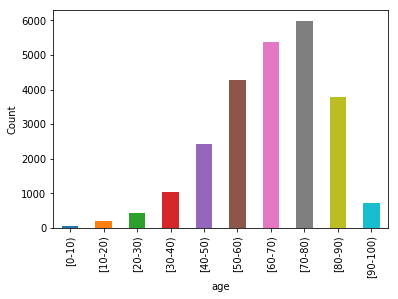

In [17]:
train.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

/home/ggk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ggk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0,0.5,'Count')

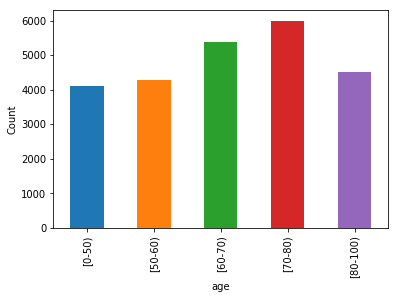

In [18]:
train['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in train['age']], index=train.index)
train['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in train['age']], index=train.index)

train.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

In [19]:
# All values in test exist in train data
def same_columns_verification(test,train):
    same = True
    for patient in test['patientID']:
        if (train.patientID == patient).any():
            pass
        else:
            same = False
    return same


In [20]:
same_columns_verification(test,train)

True

In [21]:
train.medical_specialty.unique()

array([nan, 'Oncology', 'Cardiology', 'InternalMedicine', 'Surgery-Neuro',
       'Orthopedics', 'Obstetrics', 'Family/GeneralPractice',
       'Emergency/Trauma', 'Neurology', 'Psychiatry', 'Surgery-Vascular',
       'Radiologist', 'Nephrology', 'Orthopedics-Reconstructive',
       'Surgery-General', 'Pediatrics', 'Urology', 'Pulmonology',
       'ObstetricsandGynecology', 'Surgery-Thoracic',
       'PhysicalMedicineandRehabilitation', 'Osteopath', 'Otolaryngology',
       'Surgery-Cardiovascular/Thoracic', 'Surgery-Cardiovascular',
       'Gastroenterology', 'Hematology/Oncology', 'Surgery-Pediatric',
       'Hospitalist', 'Ophthalmology', 'Surgery-Maxillofacial',
       'Endocrinology', 'Surgery-Plastic',
       'Obsterics&Gynecology-GynecologicOnco', 'Pediatrics-Neurology',
       'Gynecology', 'Hematology', 'Pediatrics-CriticalCare',
       'Psychology', 'Pediatrics-Endocrinology', 'Radiology', 'Podiatry',
       'Perinatology', 'Surgeon', 'Rheumatology',
       'Anesthesiology-Pe

In [22]:
for x in train.medical_specialty.unique():
    print(x)
    print(train[train.medical_specialty==x].Target.value_counts())

nan
Series([], Name: Target, dtype: int64)
Oncology
No     54
Yes    29
Name: Target, dtype: int64
Cardiology
No     1083
Yes     324
Name: Target, dtype: int64
InternalMedicine
No     2742
Yes    1015
Name: Target, dtype: int64
Surgery-Neuro
No     121
Yes     39
Name: Target, dtype: int64
Orthopedics
No     336
Yes     95
Name: Target, dtype: int64
Obstetrics
No     5
Yes    3
Name: Target, dtype: int64
Family/GeneralPractice
No     1228
Yes     485
Name: Target, dtype: int64
Emergency/Trauma
No     1067
Yes     361
Name: Target, dtype: int64
Neurology
No     64
Yes    13
Name: Target, dtype: int64
Psychiatry
No     168
Yes     66
Name: Target, dtype: int64
Surgery-Vascular
No     74
Yes    40
Name: Target, dtype: int64
Radiologist
No     215
Yes     72
Name: Target, dtype: int64
Nephrology
No     160
Yes     77
Name: Target, dtype: int64
Orthopedics-Reconstructive
No     309
Yes     94
Name: Target, dtype: int64
Surgery-General
No     570
Yes    202
Name: Target, dtype: int64
Pediat

In [23]:
train['N_Days_Admitted']=(pd.to_datetime(train.Discharge_date).apply(lambda x:x.date())-pd.to_datetime(train.Admission_date).apply(lambda x:x.date()))

/home/ggk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
train.sort_values('N_Days_Admitted',ascending=False).head()

,patientID,race,gender,age,weight,Target,istrain,AdmissionID,Admission_date,Discharge_date,...,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,N_Days_Admitted
18925,PT757956,type3,Female,[70-80),NaN,No,1,AD278568,2015-02-06,2015-02-20,...,No,No,Up,No,No,No,No,Ch,Yes,14 days
15686,PT902594,type1,Female,[80-100),NaN,Yes,1,AD174504,2015-05-17,2015-05-31,...,No,No,Up,No,No,No,No,Ch,Yes,14 days
9255,PT727019,type3,Male,[70-80),NaN,Yes,1,AD84769,2014-09-03,2014-09-17,...,No,No,Up,No,No,No,No,Ch,Yes,14 days
19114,PT844,type3,Male,[80-100),NaN,No,1,AD527737,2014-10-13,2014-10-27,...,No,No,No,No,No,No,No,No,No,14 days
16193,PT986689,type3,Female,[0-50),NaN,Yes,1,AD467284,2014-10-20,2014-11-03,...,No,No,Up,No,No,No,No,Ch,Yes,14 days


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f689829eb70>,
      dtype=object)

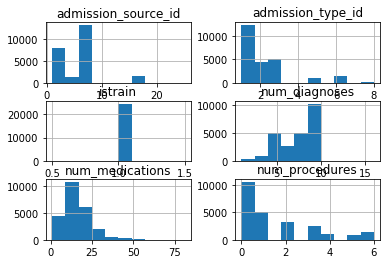

In [25]:
train.hist()

In [26]:
train1 = train.copy()

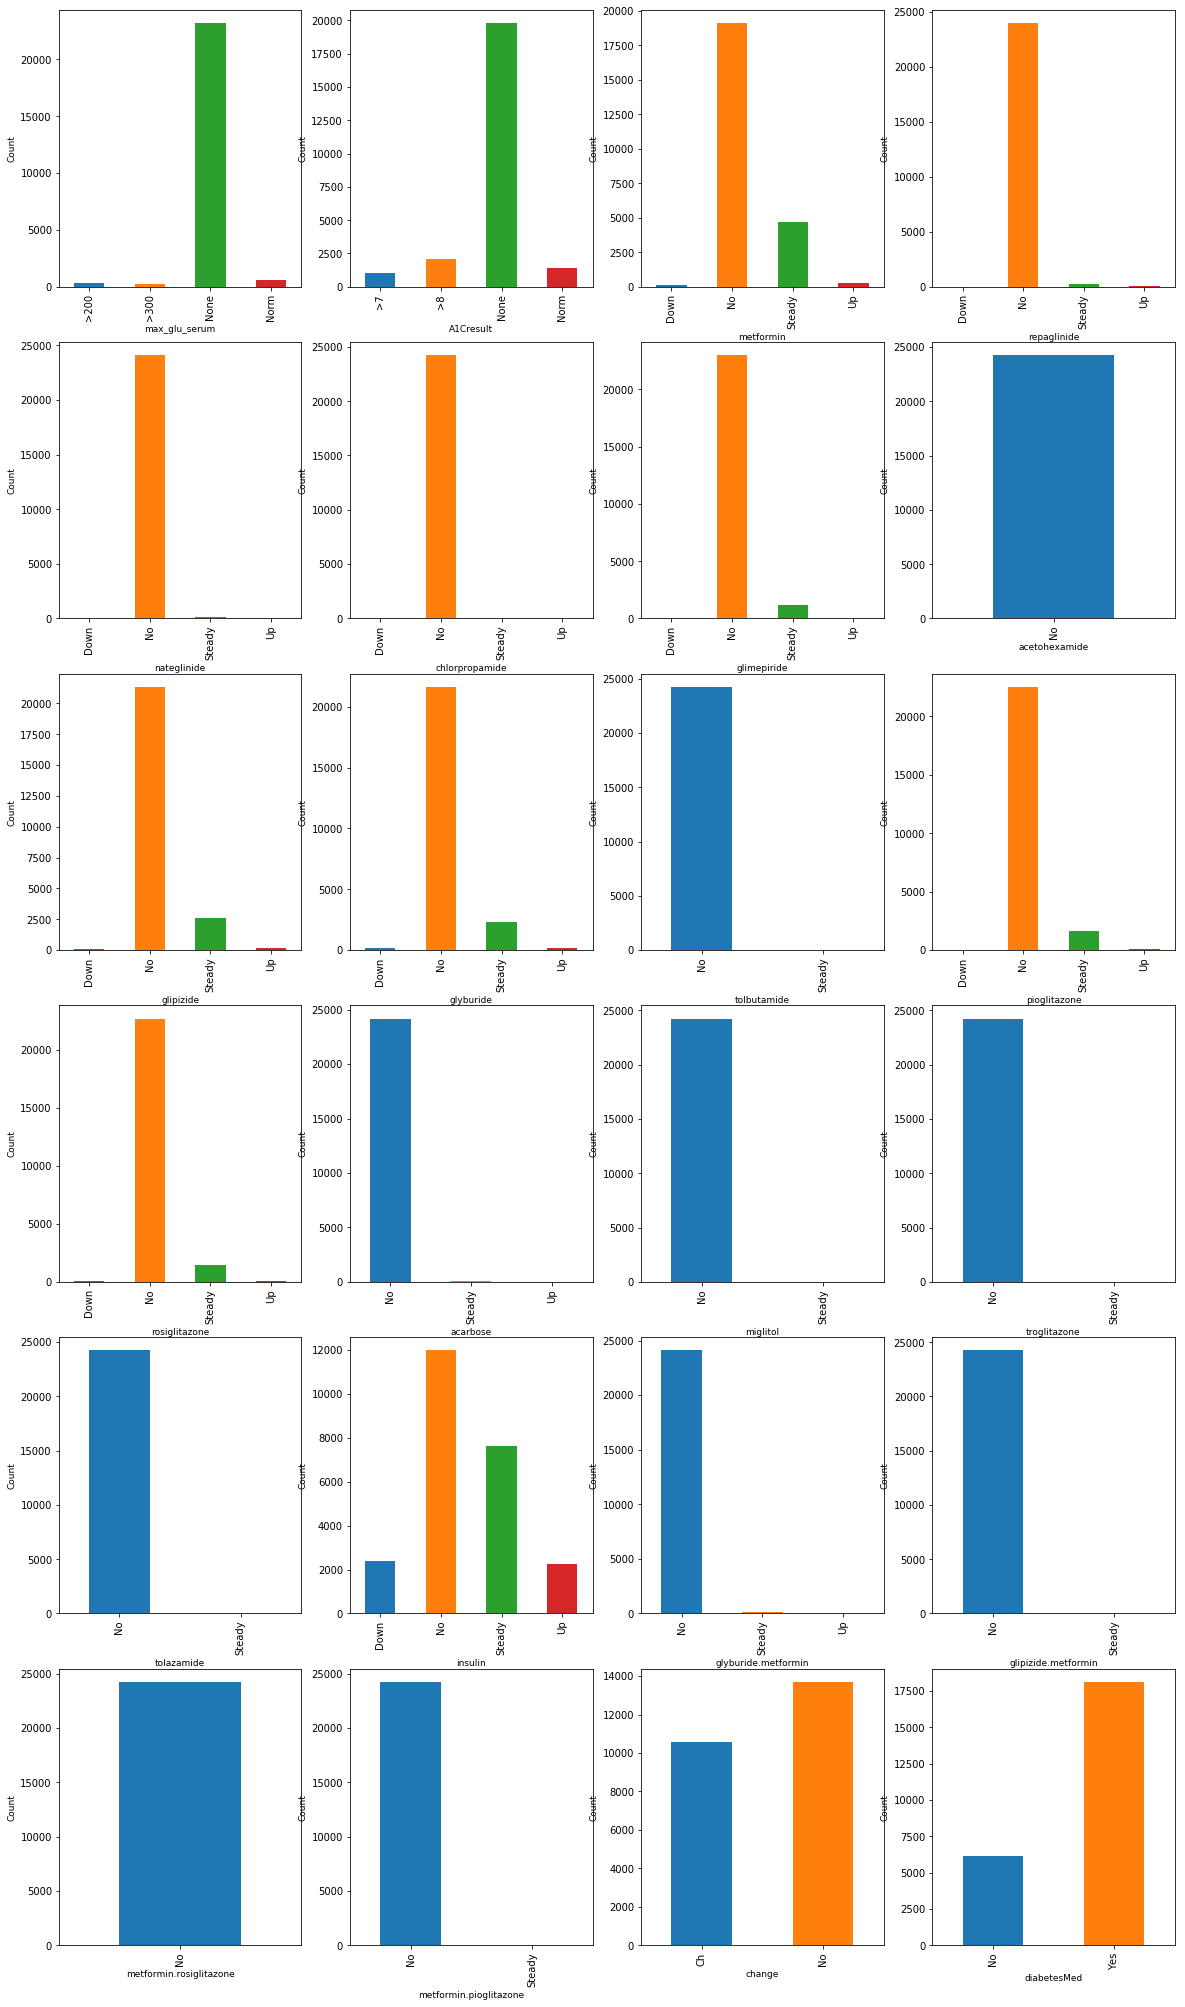

In [27]:
fig = plt.figure(figsize=(20,60))
ax=1

for x in ['max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin','glyburide.metformin', 'glipizide.metformin', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed']:
    ax1 = fig.add_subplot(10,4,ax)
    ax1 = train1.groupby(x).size().plot(kind='bar')
    plt.xlabel(x, fontsize=9)
    plt.ylabel('Count', fontsize=9)
    ax+=1

In [28]:
train1.drop(['metformin.pioglitazone','metformin.rosiglitazone','weight',
             'glipizide.metformin','tolazamide','troglitazone','miglitol',
             'tolbutamide','acetohexamide','acarbose','chlorpropamide',
             'glyburide.metformin','nateglinide','repaglinide','glimepiride',
             'pioglitazone','rosiglitazone'
            ],axis=1,inplace=True)

In [29]:
train1.columns

Index(['patientID', 'race', 'gender', 'age', 'Target', 'istrain',
       'AdmissionID', 'Admission_date', 'Discharge_date', 'admission_type_id',
       'admission_source_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'num_medications', 'num_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change',
       'diabetesMed', 'N_Days_Admitted'],
      dtype='object')

In [30]:
def compress_categories(max_cat, prop2_cat, compress_categories):
    for colname in compress_categories: 
        not_top_n=prop2_cat[colname].value_counts().sort_values(ascending=False).index[max_cat-1:]
    
        if (len(not_top_n) == 0 ):
            pass
        else:
            prop2_cat[colname].replace(not_top_n,'other',inplace=True)
    return prop2_cat

In [31]:
compress_categories(5,train1,['admission_type_id','admission_source_id']).head(10)

,patientID,race,gender,age,Target,istrain,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,num_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted
0,PT456611,type3,Female,[80-100),No,1,AD988251,2015-05-04,2015-05-07,1,...,9,None,None,No,No,No,Steady,Ch,Yes,3 days
1,PT956824,type1,Male,[50-60),Yes,1,AD725487,2014-02-20,2014-02-23,1,...,6,None,None,No,No,No,No,No,No,3 days
2,PT453330,type3,Female,[80-100),No,1,AD492141,2015-06-01,2015-06-04,1,...,9,None,None,No,No,No,No,No,No,3 days
3,PT677563,type3,Female,[50-60),No,1,AD561393,2015-12-18,2015-12-20,2,...,5,None,None,No,No,No,Steady,No,Yes,2 days
4,PT102924,type3,Male,[60-70),Yes,1,AD619257,2015-08-19,2015-08-20,3,...,9,None,None,No,No,No,No,No,No,1 days
5,PT899812,type3,Male,[70-80),Yes,1,AD753421,2015-04-12,2015-04-15,2,...,8,None,None,No,No,No,No,No,No,3 days
6,PT42059,type3,Male,[70-80),No,1,AD378459,2016-04-12,2016-04-14,2,...,3,None,>8,No,No,No,No,No,No,2 days
7,PT889522,type3,Female,[70-80),No,1,AD910895,2016-05-29,2016-06-06,1,...,9,None,None,No,No,No,No,No,No,8 days
8,PT994247,type3,Male,[60-70),No,1,AD170270,2014-07-16,2014-07-19,1,...,4,None,None,Steady,No,Steady,No,Ch,Yes,3 days
9,PT544052,type3,Male,[60-70),No,1,AD564354,2015-08-22,2015-08-23,other,...,9,None,Norm,No,No,No,Steady,No,Yes,1 days


In [32]:
train1['medical_specialty'] = train1['medical_specialty'].apply(lambda x:'SurgeryRelated' if x in ['Surgery-Neuro', 'Surgery-Vascular', 'Surgery-General',
       'Surgery-Thoracic', 'Surgery-Cardiovascular/Thoracic',
       'Surgery-Cardiovascular', 'Surgery-Pediatric',
       'Surgery-Maxillofacial', 'Surgery-Plastic', 'Surgeon',
       'Surgery-Colon&Rectal'] else x)

In [33]:
train1['medical_specialty'] = train1['medical_specialty'].apply(lambda x:'Pediatrics' if x in ['Pediatrics-Endocrinology', 'Pediatrics', 'Pediatrics-CriticalCare',
       'Pediatrics-Neurology', 'Pediatrics-Hematology-Oncology'] else x)

In [34]:
compress_categories(5,train1,['medical_specialty']).head()

,patientID,race,gender,age,Target,istrain,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,num_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted
0,PT456611,type3,Female,[80-100),No,1,AD988251,2015-05-04,2015-05-07,1,...,9,None,None,No,No,No,Steady,Ch,Yes,3 days
1,PT956824,type1,Male,[50-60),Yes,1,AD725487,2014-02-20,2014-02-23,1,...,6,None,None,No,No,No,No,No,No,3 days
2,PT453330,type3,Female,[80-100),No,1,AD492141,2015-06-01,2015-06-04,1,...,9,None,None,No,No,No,No,No,No,3 days
3,PT677563,type3,Female,[50-60),No,1,AD561393,2015-12-18,2015-12-20,2,...,5,None,None,No,No,No,Steady,No,Yes,2 days
4,PT102924,type3,Male,[60-70),Yes,1,AD619257,2015-08-19,2015-08-20,3,...,9,None,None,No,No,No,No,No,No,1 days


In [35]:
train1.medical_specialty.value_counts()

other                     4474
InternalMedicine          3757
Family/GeneralPractice    1713
Emergency/Trauma          1428
Cardiology                1407
Name: medical_specialty, dtype: int64

In [36]:
train1.columns

Index(['patientID', 'race', 'gender', 'age', 'Target', 'istrain',
       'AdmissionID', 'Admission_date', 'Discharge_date', 'admission_type_id',
       'admission_source_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'num_medications', 'num_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change',
       'diabetesMed', 'N_Days_Admitted'],
      dtype='object')

In [37]:
train1['gender'] = train1.gender.map({'Male':1,'Female':0})
train1['change'] = train1.change.map({'Ch':1,'No':0})
train1['diabetesMed'] = train1.diabetesMed.map({'Yes':1,'No':0})
train1['admission_type_id'] = train1['admission_type_id'].replace({'other':0})
train1['admission_source_id'] = train1['admission_source_id'].replace({'other':0})

# Getting n_days in int from datetime datatype
train1['N_Days_Admitted'] = train1.N_Days_Admitted.apply(lambda x:x.days)

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cat_cols = ['race','age','max_glu_serum','medical_specialty',
           'A1Cresult', 'metformin', 'glipizide', 'glyburide',
           'insulin']

for col in cat_cols:
    train1[col] = le.fit_transform(train1[col].fillna(train1[col].mode()[0]))

train1.head()

,patientID,race,gender,age,Target,istrain,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,num_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted
0,PT456611,2,0,4,No,1,AD988251,2015-05-04,2015-05-07,1,...,9,2,2,1,1,1,2,1,1,3
1,PT956824,0,1,1,Yes,1,AD725487,2014-02-20,2014-02-23,1,...,6,2,2,1,1,1,1,0,0,3
2,PT453330,2,0,4,No,1,AD492141,2015-06-01,2015-06-04,1,...,9,2,2,1,1,1,1,0,0,3
3,PT677563,2,0,1,No,1,AD561393,2015-12-18,2015-12-20,2,...,5,2,2,1,1,1,2,0,1,2
4,PT102924,2,1,2,Yes,1,AD619257,2015-08-19,2015-08-20,3,...,9,2,2,1,1,1,1,0,0,1


In [39]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24256 entries, 0 to 24255
Data columns (total 25 columns):
patientID              24256 non-null object
race                   24256 non-null int64
gender                 24256 non-null int64
age                    24256 non-null int64
Target                 24256 non-null object
istrain                24256 non-null int64
AdmissionID            24256 non-null object
Admission_date         24256 non-null object
Discharge_date         24256 non-null object
admission_type_id      24256 non-null int64
admission_source_id    24256 non-null int64
payer_code             14045 non-null object
medical_specialty      24256 non-null int64
num_procedures         24256 non-null int64
num_medications        24256 non-null int64
num_diagnoses          24256 non-null int64
max_glu_serum          24256 non-null int64
A1Cresult              24256 non-null int64
metformin              24256 non-null int64
glipizide              24256 non-null int64
glybu

In [40]:
train1.corr()

,race,gender,age,istrain,admission_type_id,admission_source_id,medical_specialty,num_procedures,num_medications,num_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted
race,1.000000,0.070058,0.113322,NaN,0.060326,0.011732,-0.005191,0.038244,0.019844,0.052917,-0.008934,-0.003954,0.003094,0.009489,0.015843,-0.029324,-0.004176,-0.007616,-0.013403
gender,0.070058,1.000000,-0.060573,NaN,0.014525,0.007946,-0.021965,0.064864,-0.012808,-0.007505,0.002988,-0.022611,0.009800,0.039178,0.028840,0.012460,0.021522,0.023549,-0.021512
age,0.113322,-0.060573,1.000000,NaN,-0.030836,0.039717,-0.017088,-0.052196,0.037716,0.241095,0.005294,0.064136,-0.088307,0.026189,0.047252,-0.022579,-0.055240,-0.034152,0.138121
istrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,0.060326,0.014525,-0.030836,NaN,1.000000,-0.083657,-0.097700,0.182617,0.115835,-0.086608,-0.014060,0.023807,0.023543,0.016988,0.010185,-0.044473,-0.029657,-0.020353,0.009786
admission_source_id,0.011732,0.007946,0.039717,NaN,-0.083657,1.000000,-0.090821,-0.135800,-0.074206,0.108275,-0.061007,0.001751,-0.015737,0.011430,-0.005132,-0.022315,0.000993,-0.014330,-0.004946
medical_specialty,-0.005191,-0.021965,-0.017088,NaN,-0.097700,-0.090821,1.000000,-0.074406,0.061684,0.027185,0.003963,0.035717,0.022435,-0.020627,0.003845,0.008809,-0.005786,-0.002870,0.042748
num_procedures,0.038244,0.064864,-0.052196,NaN,0.182617,-0.135800,-0.074406,1.000000,0.418478,0.082258,0.015023,0.015736,-0.042518,0.001015,0.008529,0.026498,0.016342,0.007284,0.189646
num_medications,0.019844,-0.012808,0.037716,NaN,0.115835,-0.074206,0.061684,0.418478,1.000000,0.254275,-0.017784,0.000377,0.073885,0.054871,0.047002,0.094435,0.251938,0.202576,0.474069
num_diagnoses,0.052917,-0.007505,0.241095,NaN,-0.086608,0.108275,0.027185,0.082258,0.254275,1.000000,0.004038,0.049031,-0.065095,-0.002191,-0.024925,0.023458,0.044964,0.012692,0.238436


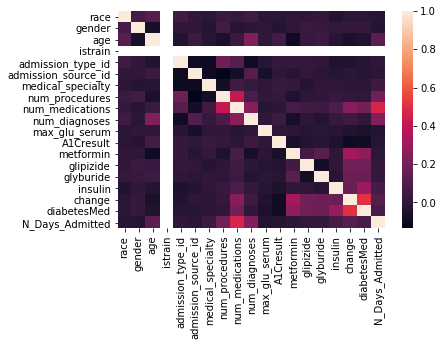

In [41]:
import seaborn as sb
sb.heatmap(train1.corr())

In [42]:
train1.drop(['patientID','AdmissionID','Admission_date','Discharge_date','payer_code','istrain'],inplace=True,axis=1)

In [43]:
y = train1['Target'].map({'Yes':1,'No':0})
train1.drop(['Target'],axis=1,inplace=True)
X = train1

In [44]:
X

,race,gender,age,admission_type_id,admission_source_id,medical_specialty,num_procedures,num_medications,num_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted
0,2,0,4,1,1,4,0,11,9,2,2,1,1,1,2,1,1,3
1,0,1,1,1,7,4,1,6,6,2,2,1,1,1,1,0,0,3
2,2,0,4,1,7,4,2,27,9,2,2,1,1,1,1,0,0,3
3,2,0,1,2,1,0,3,10,5,2,2,1,1,1,2,0,1,2
4,2,1,2,3,1,4,6,12,9,2,2,1,1,1,1,0,0,1
5,2,1,3,2,1,4,0,7,8,2,2,1,1,1,1,0,0,3
6,2,1,3,2,0,4,0,6,3,2,1,1,1,1,1,0,0,2
7,2,0,3,1,0,3,1,16,9,2,2,1,1,1,1,0,0,8
8,2,1,2,1,7,4,1,5,4,2,2,2,1,2,1,1,1,3
9,2,1,2,0,1,4,0,15,9,2,3,1,1,1,2,0,1,1


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

rfm = RandomForestClassifier(random_state=10)
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [53]:
rfm.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
rfm.score(X_test,y_test)

0.7077493816982687

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=10)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

In [56]:
gbc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
gbc.score(X_test,y_test)

0.7337180544105524